In [204]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [205]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None,names=labels)

In [206]:
new_data = pd.DataFrame(tumor_data[["Malignant/Benign", 'smoothness (mean)', 'radius (mean)']][272:278])


mean_smooth = new_data['smoothness (mean)'].mean()
mean_radius = new_data['radius (mean)'].mean()

print(mean_smooth,mean_radius)
new_data['smoothness (zero mean)'] = new_data['smoothness (mean)'] - new_data['smoothness (mean)'].mean()
new_data['radius (zero mean)'] = new_data['radius (mean)'] - new_data['radius (mean)'].mean()

new_data

3.555166666666667 15.241999999999999


,Malignant/Benign,smoothness (mean),radius (mean),smoothness (zero mean),radius (zero mean)
272,M,8.867,21.750,5.311833,6.508
273,B,1.750,9.742,-1.805167,-5.500
274,M,2.765,17.930,-0.790167,2.688
275,B,4.021,11.890,0.465833,-3.352
276,B,1.565,11.330,-1.990167,-3.912
277,M,2.363,18.810,-1.192167,3.568


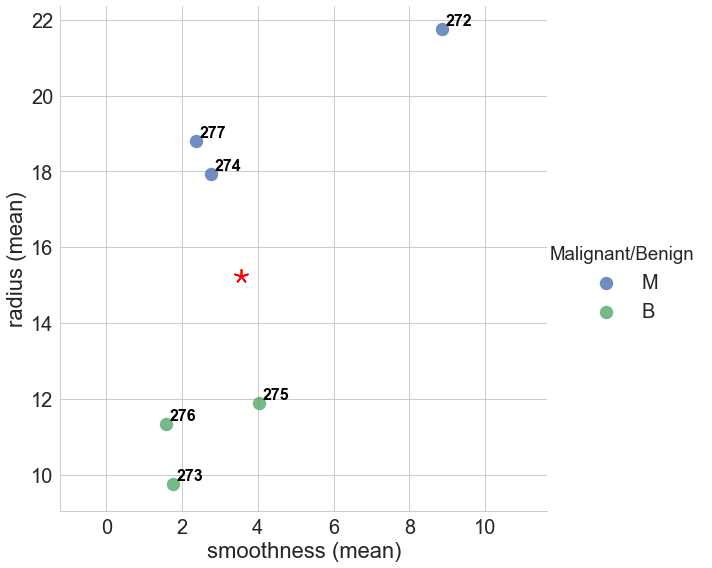

In [207]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
        
ax.scatter(mean_smooth,mean_radius,  s=180, c='r', marker=(5, 2))

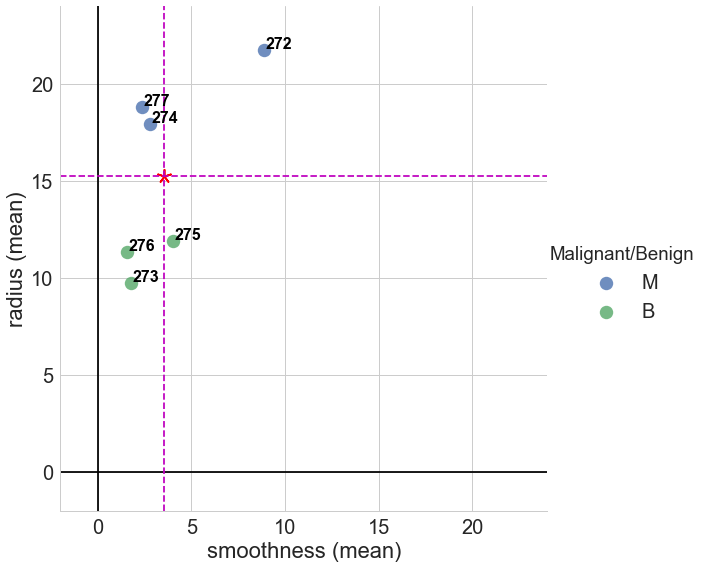

In [203]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
plt.xlim(-2,24)
plt.ylim(-2,24)
for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
        
ax.scatter(mean_smooth,mean_radius,  s=180, c='r', marker=(5, 2))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axhline(y=mean_radius, color='m',linestyle='--')
ax.axvline(x=mean_smooth, color='m',linestyle='--')

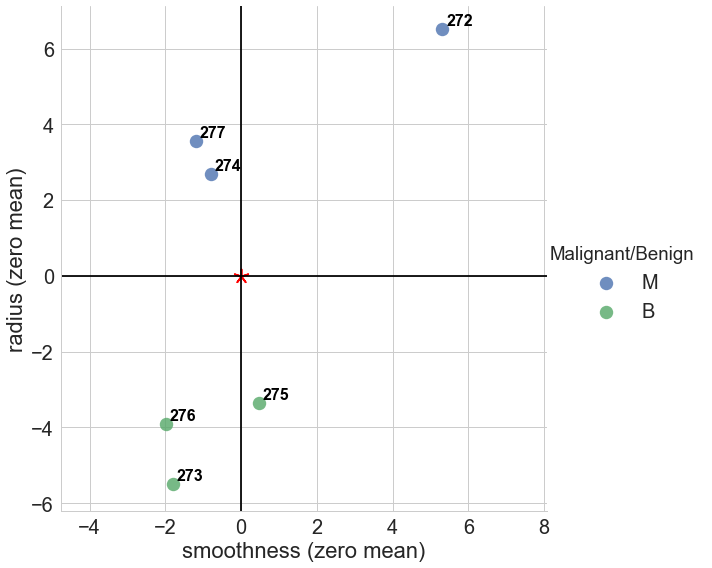

In [189]:

g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

## Get covariance matrix

In [156]:
A = new_data[['smoothness (zero mean)', 'radius (zero mean)']]
A.cov()

,smoothness (zero mean),radius (zero mean)
smoothness (zero mean),7.539518,8.868854
radius (zero mean),8.868854,23.819936


In [157]:
# Another way to get the covariance matrix
Xnp = np.array(X)
cov_matrix = (1/(len(X)-1))*Xnp.T@Xnp
print(cov_matrix)

[[  7.53951777   8.8688536 ]
 [  8.8688536   23.819936  ]]


## Singular value decomposition

In [158]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# variances = eig(covariance) = singular values squared
variances = S**2

print(variances)

print(S)

# principal directions
pc1_vec = Vt[0,:]
pc2_vec = Vt[1,:]

[ 138.58990634   18.20736249]
[ 11.77242143   4.26700861]


## Diagonalization of covariance matrix

In [159]:
(Vt.T@np.diag(variances)@Vt)/(len(X)-1)

array([[  7.53951777,   8.8688536 ],
       [  8.8688536 ,  23.819936  ]])

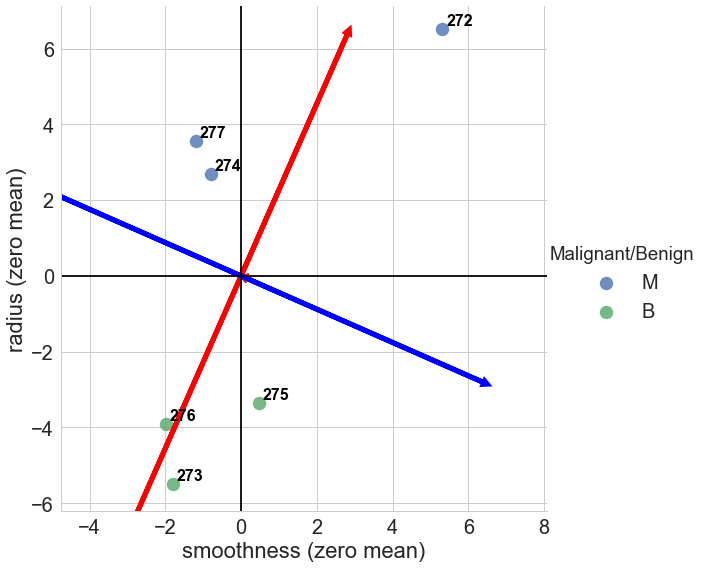

In [160]:
g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, size=8)
ax = g1.axes[0,0]

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))
ax.axis('equal')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

scale = 7
ax.arrow(-scale*pc1_vec[0], -scale*pc1_vec[1], 2*scale*pc1_vec[0], 2*scale*pc1_vec[1], head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)
ax.arrow(-scale*pc2_vec[0], -scale*pc2_vec[1], 2*scale*pc2_vec[0], 2*scale*pc2_vec[1], head_width=0.1, head_length=0.1, fc='b', ec='b', lw=5)

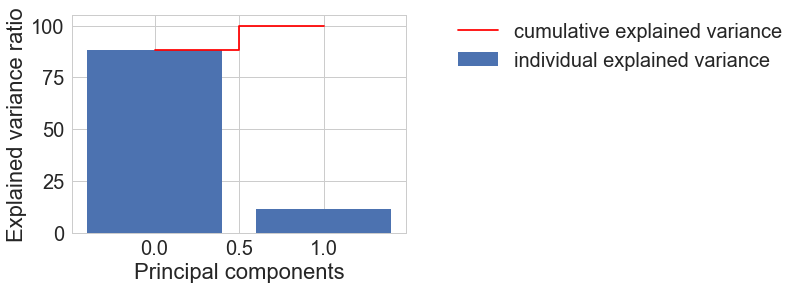

In [161]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print()

In [162]:
Xstar=X@Vt.T
new_data['pc1'] = Xstar[:,0]  
new_data['pc2'] = Xstar[:,1]  

In [175]:
f1 = Vt[:,0]
f2 = Vt[:,1]

Text(6.60834,-2.8166,'radius (zero mean)')

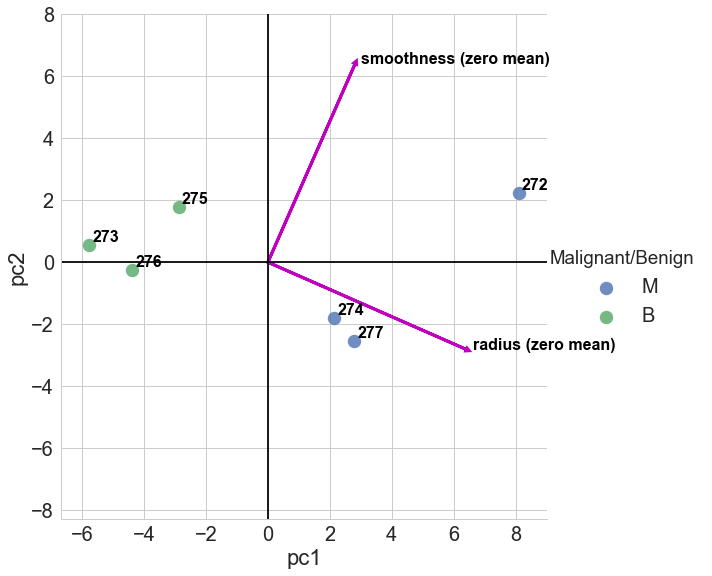

In [184]:
g1 = sns.lmplot('pc1', 'pc2', new_data, hue="Malignant/Benign", fit_reg=False, size=8, scatter_kws={"s": 180})
ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')


for i in range(272,278):
    x = new_data['pc1'][i] + 0.1
    y = new_data['pc2'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

    
scale = 7
ax.arrow(0,0, scale*f1[0], scale*f1[1], head_width=0.1, head_length=0.1, fc='m', ec='m', lw=3)
ax.text(scale*f1[0]+0.2, scale*f1[1], "smoothness (zero mean)", horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
ax.arrow(0,0, scale*f2[0], scale*f2[1], head_width=0.1, head_length=0.1, fc='m', ec='m', lw=3)
ax.text(scale*f2[0]+0.2, scale*f2[1], "radius (zero mean)", horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
